In [3]:
import torch
import torch.nn as nn
import numpy as np

In [4]:
# Load NN model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim1=32, hidden_dim2=32, dropout_rate=0.685):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_dim2, 1)
    
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the model with the same architecture
X_train_CNN_Bay_others = np.load('../../Data/X_train_CNN_Bay_others.npy')
input_dim = X_train_CNN_Bay_others.shape[1]
ensemble_model = NeuralNetwork(input_dim)

# Load the weights saved in the model
ensemble_model.load_state_dict(torch.load('../../Data/Calibrated_models/ensemble_model_V0.pth'))

# Set up the model for evaluation
ensemble_model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=24, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.685, inplace=False)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.685, inplace=False)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
# Load test data for validation

In [6]:
X_test_tensor = torch.load('../../Data/X_test_tensor.pt')

In [8]:
y_test_tensor = torch.load('../../Data/y_test_tensor.pt')

In [ ]:
# Validation

In [12]:
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions from the ensemble model
with torch.no_grad():
    y_pred_test_loaded_model = ensemble_model(X_test_tensor).numpy()

# Convert y_test to NumPy
y_test_numpy = y_test_tensor.numpy()

# R^2
r2_ensemble = r2_score(y_test_numpy, y_pred_test_loaded_model)
print(f'R^2 Score: {r2_ensemble}')

# MSE
mse_loss_ensemble = mean_squared_error(y_test_numpy, y_pred_test_loaded_model)
print("MSE:", mse_loss_ensemble)

# RMSE
rmse_loss_ensemble = np.sqrt(mse_loss_ensemble)
print("RMSE:", rmse_loss_ensemble)

# MAE
mae_loss_ensemble = mean_absolute_error(y_test_numpy, y_pred_test_loaded_model)
print("MAE:", mae_loss_ensemble)

# Flatten y_test so that it has a single dimension
y_test_flat = y_test_numpy.flatten()

# Pearson's r
corr_ensemble, p_value_r_ensemble = pearsonr(y_test_flat, y_pred_test_loaded_model.flatten())
print("Pearson's r:", corr_ensemble)
print("p-value (Pearson):", p_value_r_ensemble)

# Spearman's rho
rho_ensemble, p_value_rho_ensemble = spearmanr(y_test_flat, y_pred_test_loaded_model.flatten())
print("Spearman's rho:", rho_ensemble)
print("p-value (Spearman):", p_value_rho_ensemble)

R^2 Score: 0.3230611340201648
MSE: 1.3858441
RMSE: 1.1772188
MAE: 0.95856446
Pearson's r: 0.6380907992255651
p-value (Pearson): 1.6012376806592865e-18
Spearman's rho: 0.6351994975314353
p-value (Spearman): 2.542851029777713e-18


In [ ]:
# Plot Fig 1b

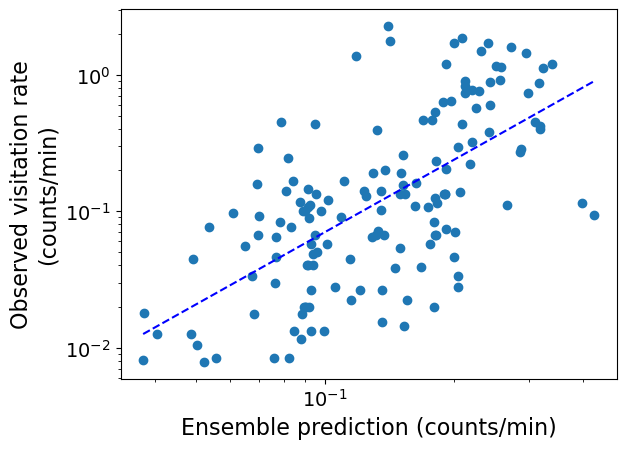

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test to NumPy
y_test_numpy = y_test_tensor.numpy()

# Exponentiate point values
y_test_1d = y_test_numpy.flatten()
y_test_1d_exp = np.exp(y_test_1d)
y_pred_test_exp = np.exp(y_pred_test_loaded_model.flatten())

# Fit a regression line with numpy on exponential scale
coef = np.polyfit(np.log10(y_pred_test_exp), np.log10(y_test_1d_exp), 1)
poly1d_fn = np.poly1d(coef)

# Create a dispersion plot
plt.scatter(y_pred_test_exp, y_test_1d_exp)
plt.plot(sorted(y_pred_test_exp), 10**poly1d_fn(np.log10(sorted(y_pred_test_exp))), color='blue', linestyle='--')

# Set log_10 scale
plt.xscale('log')
plt.yscale('log')

# Axis labels
plt.xlabel('Ensemble prediction (counts/min)', fontsize=16)
plt.ylabel('Observed visitation rate\n(counts/min)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save plot
plt.savefig('../../Figures/fig1b.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()